In [ ]:
#importing the libraries
import tensorflow as tf
import numpy as пр
import pandas as pd
import json
import nltk
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.layers import Input, Embedding, LSTM , Dense, GlobalMaxPooling1D, Flatten
from tensorflow.keras.models import Model
import matplotlib.pyplot as plt


In [ ]:
%%writefile content.json
{"intents":[
    {
        "tag":"greeting",
                                              
        "input":[
               "Hello",
              "Hello there!",
              "Hi!",
              "Hey, how are you?",
              "Good day!",
              "Good morning!",
              "Good afternoon!",
              "Good evening!",
              "Howdy!",
              "Greetings!",
              "Salutations!",
              "What's up?",
              "Yo!",
              "Good to see you!",
              "Welcome back!",
              "Hiya!",
              "Hey there, how's it going?",
              "Nice to meet you!"

        ],
        "responses":[
            "Hello! How can I help you today?",
            "Hi there! What can I assist you with?",
            "Hey, how can I assist you?",
            "Good [morning/afternoon/evening]! How may I assist you?",
            "Greetings! What can I help you with today?",
            "Hello! How may I assist you today?",
            "Hi there! How can I help you?",
            "Hey! What can I do for you?",
            "Good day! What can I help you with?",
            "hey! How may I assist you today?",
            "hey! What can I help you find?",
            "Hi! What do you need help with?",
            "Greetings! How can I assist you today?",
            "Salutations! What can I help you with?",
            "Hi there, welcome back! How may I assist you?",
            "It's great to hear from you! What can I do for you?",
            "What can I help you with today?",
            "How can I assist you with your request?",
            "What can I assist you with today?",
            "What can I do to help you?",
            "How can I support you today?",
            "What do you need assistance with?",
            "What can I help you find today?"
          ]
        
    },

    {
        "tag":"product_info",
                                              
        "input":[
             "What kind of products do you offer?",
              "Can you tell me about your product selection?",
              "What items are available for purchase?",
              "May I know what products are available in your inventory?",
              "What do you have for sale?",
              "Could you provide me with a list of your products?",
             "What types of goods do you carry?",
              "What is your range of products?",
              "Can you give me an idea of what products you have in store?"
        ],
        "responses":[
          "Our product lineup consists solely of iPhones, including the iPhone 13 and iPhone 14 versions.",
         "We specialize in selling iPhones and offer a range of models, including the iPhone 13 and iPhone 14 versions.",
          "We carry an exclusive selection of iPhone products, including both the iPhone 13 and iPhone 14 versions"
                  
                  ]
        
    },
      {
        "tag":"promotions",
                                              
        "input":[
             "Are there any special deals or promotions currently available?",
              "Do you have any discounts or sales running at the moment?",
              "Are there any exclusive offers or promotions for new customers?",
              "Can you tell me about any ongoing promotions or specials?",
              "What kind of deals or discounts do you have available?",
              "Are there any limited-time offers or promotions I should know about?",
              "Can you provide me with information about any promotional bundles or packages?",
              "Are there any seasonal or holiday promotions currently running?",
              "Do you have any loyalty or rewards programs that I could benefit from?",
              "Are there any coupon codes or promotional codes I could use for my purchase?"
        ],
        "responses":[
                "yes, we have. For more information please visit our official website www.iphones.lk."
                  
                  ]
        
    },
      {
        "tag":"branch_moratuwa",
                                              
        "input":[
             "What is the phone number for the Moratuwa branch?",
              "Can you provide me with the contact number for the Moratuwa location?",
              "I would like to get in touch with the Moratuwa branch. Could you give me their phone number?",
              "How can I reach the Moratuwa branch by phone? Can you give me their contact number?",
              "Can you tell me the telephone number for the Moratuwa location?",
              "I need to contact the Moratuwa branch. What is their phone number?",
              "Would you happen to have the contact number for the Moratuwa branch?",
              "Could you please give me the phone number for the Moratuwa location?",
              "What is the contact number for the Moratuwa branch that I can reach?",
              "May I have the phone number for the Moratuwa branch, please?"
        ],
        "responses":[

                "The contact number for Moratuwa branch is 071X XXX XXX and  address is No 11B Galle Road Moratuwa.",
                "You can reach Moratuwa branch at 071X XXX XXX and their location is No 11B Galle Road Moratuwa.",
                "Moratuwa branch phone number is 071X XXX XXX and they are located at No 11B Galle Road Moratuwa."
                          
             ]
        
    },
     {
        "tag":"branch_negegoda",
                                              
        "input":[
             "What is the phone number for the Nugegoda branch?",
              "Can you provide me with the contact number for the Nugegoda location?",
              "I would like to get in touch with the Nugegoda branch. Could you give me their phone number?",
              "How can I reach the Nugegoda branch by phone? Can you give me their contact number?",
              "Can you tell me the telephone number for the Nugegoda location?",
              "I need to contact the Nugegoda branch. What is their phone number?",
              "Would you happen to have the contact number for the Nugegoda branch?",
              "Could you please give me the phone number for the Nugegoda location?",
              "What is the contact number for the Nugegoda branch that I can reach?",
              "May I have the phone number for the Nugegoda branch, please?"
        ],
        "responses":[

                "The contact number for Nugegoda branch is 077X XXX XXX and  address is No 11B highlevel Road Nugegoda.",
                "You can reach Nugegoda branch at 077X XXX XXX and their location is No 11B highlevel Road Nugegoda.",
                "Nugegoda branch phone number is 077X XXX XXX and they are located at No 11B highlevel Road Nugegoda."
                          
             ]
        
    },
     {
        "tag":"branch_dehiwala",
                                              
        "input":[
             "What is the phone number for the Dehiwala branch?",
              "Can you provide me with the contact number for the Dehiwala location?",
              "I would like to get in touch with the Dehiwala branch. Could you give me their phone number?",
              "How can I reach the Dehiwala branch by phone? Can you give me their contact number?",
              "Can you tell me the telephone number for the Dehiwala location?",
              "I need to contact the Dehiwala branch. What is their phone number?",
              "Would you happen to have the contact number for the Dehiwala branch?",
              "Could you please give me the phone number for the Dehiwala location?",
              "What is the contact number for the Dehiwala branch that I can reach?",
              "May I have the phone number for the Dehiwala branch, please?"
        ],
        "responses":[

                "The contact number for Dehiwala branch is 077X XXX XXX and  address is No 05D Galle Road Dehiwala.",
                "You can reach Dehiwala branch at 077X XXX XXX and their location is No 05D Galle Road Dehiwala.",
                "Dehiwala branch phone number is 077X XXX XXX and they are located at No 05D Galle Road Dehiwala."
                          
             ]
        
    },
    {
        "tag":"iPhone_13_locations",
                                              
        "input":[
                  "Where can I purchase an iPhone 13?",
                  "Can you tell me where I can buy an iPhone 13?",
                  "What stores carry the iPhone 13?",
                  "Where is the nearest location to buy an iPhone 13?",
                  "Do you know where I can find an iPhone 13 for sale?",
                  "Which retailers sell the iPhone 13?",
                  "Can you help me find a place to buy an iPhone 13?",
                  "Where can I go to purchase the iPhone 13?",
                  "What are my options for buying an iPhone 13?",
                  "Do you have any information on where I can purchase an iPhone 13?"
                    ] ,
          "responses":[
                   "iPhone_13_locations"
                  ]   
    },
        { 
        "tag":"iPhone_13_pro_locations",
                                              
        "input":[
                  "Where can I purchase an iPhone 13 Pro?",
                  "Can you tell me where I can buy an iPhone 13 Pro?",
                  "What stores carry the iPhone 13 Pro?",
                  "Where is the nearest location to buy an iPhone 13 Pro?",
                  "Do you know where I can find an iPhone 13 Pro for sale?",
                  "Which retailers sell the iPhone 13 Pro?",
                  "Can you help me find a place to buy an iPhone 13 Pro?",
                  "Where can I go to purchase the iPhone 13 Pro?",
                  "What are my options for buying an iPhone 13 Pro?",
                  "Do you have any information on where I can purchase an iPhone 13 Pro?"
                    ] ,
                    "responses":[
                      "iPhone_13_pro_locations"
                   ]  
    },
        {
        "tag":"iPhone_13_pro_max_locations",
                                              
        "input":[
                  "Where can I purchase an iPhone 13 Pro Max?",
                  "Can you tell me where I can buy an iPhone 13 Pro Max?",
                  "What stores carry the iPhone 13 Pro Max?",
                  "Where is the nearest location to buy an iPhone 13 Pro Max?",
                  "Do you know where I can find an iPhone 13 Pro Max for sale?",
                  "Which retailers sell the iPhone 13 Pro Max?",
                  "Can you help me find a place to buy an iPhone 13 Pro Max?",
                  "Where can I go to purchase the iPhone 13 Pro Max?",
                  "What are my options for buying an iPhone 13 Pro Max?",
                  "Do you have any information on where I can purchase an iPhone 13 Pro Max?"
                    ], 
                    "responses":[
                      "iPhone_13_pro_max_locations"
                   ] 
    },
        {
        "tag":"iPhone_14_locations",
                                              
        "input":[
                  "Where can I purchase an iPhone 14?",
                  "Can you tell me where I can buy an iPhone 14?",
                  "What stores carry the iPhone 14?",
                  "Where is the nearest location to buy an iPhone 14?",
                  "Do you know where I can find an iPhone 14 for sale?",
                  "Which retailers sell the iPhone 14?",
                  "Can you help me find a place to buy an iPhone 14?",
                  "Where can I go to purchase the iPhone 14?",
                  "What are my options for buying an iPhone 14?",
                  "Do you have any information on where I can purchase an iPhone 14?"
                    ],  
                    "responses":[
                      "iPhone_14_locations"
                   ] 
    },
     {
        "tag":"iPhone_14_plus_locations",
                                              
        "input":[
                  "Where can I purchase an iPhone 14 plus?",
                  "Can you tell me where I can buy an iPhone 14 plus?",
                  "What stores carry the iPhone 14 plus?",
                  "Where is the nearest location to buy an iPhone 14 plus?",
                  "Do you know where I can find an iPhone 14 plus for sale?",
                  "Which retailers sell the iPhone 14 plus?",
                  "Can you help me find a place to buy an iPhone 14 plus?",
                  "Where can I go to purchase the iPhone 14 plus?",
                  "What are my options for buying an iPhone 14 plus?",
                  "Do you have any information on where I can purchase an iPhone 14 plus?"
                    ] ,
                    "responses":[
                      "iPhone_14_plus_locations"
                   ] 
    },
        {
        "tag":"iPhone_14_pro_locations",
                                              
        "input":[
                  "Where can I purchase an iPhone 14 pro?",
                  "Can you tell me where I can buy an iPhone 14 pro?",
                  "What stores carry the iPhone 14 pro?",
                  "Where is the nearest location to buy an iPhone 14 pro?",
                  "Do you know where I can find an iPhone 14 pro for sale?",
                  "Which retailers sell the iPhone iPhone 14 pro?",
                  "Can you help me find a place to buy an iPhone 14 pro?",
                  "Where can I go to purchase the iPhone 14 pro?",
                  "What are my options for buying an iPhone 14 pro?",
                  "Do you have any information on where I can purchase an iPhone 14 pro?"
                    ],
                    "responses":[
                      "iPhone_14_pro_locations"
                   ] 
    },
    {
        "tag":"iPhone_13_price",
                                              
        "input":[
              "What is the cost of an iPhone 13?",
              "How much does an iPhone 13 cost?",
              "What is the price of the iPhone 13?",
              "Can you tell me how much an iPhone 13 costs?",
              "What is the asking price for an iPhone 13?",
              "How much do I need to pay for an iPhone 13?",
              "What is the retail price of an iPhone 13?",
              "Can you provide me with the price of an iPhone 13?",
              "What is the price range for the iPhone 13?",
              "What is the cost for the newest iPhone 13?"
        ],
        "responses":[
          "iPhone_13_price"
       ] 
        
    },
        {
        "tag":"iPhone_13_Pro_price",
                                              
        "input":[
              "What is the cost of an iPhone 13 Pro?",
              "How much does an iPhone 13 Pro cost?",
              "What is the price of the iPhone 13 Pro?",
              "Can you tell me how much an iPhone 13 Pro costs?",
              "What is the asking price for an iPhone 13 Pro?",
              "How much do I need to pay for an iPhone 13 Pro?",
              "What is the retail price of an iPhone 13 Pro?",
              "Can you provide me with the price of an iPhone 13 Pro?",
              "What is the price range for the iPhone 13 Pro?",
              "What is the cost for the newest iPhone 13 Pro?"
        ],
        "responses":[
          "iPhone_13_pro_price"
       ]
     
    },
    {
        "tag":"iPhone_13_Pro_Max_price",
                                              
        "input":[
              "What is the cost of an iPhone 13 Pro Max?",
              "How much does an iPhone 13 Pro Max cost?",
              "What is the price of the iPhone 13 Pro Max?",
              "Can you tell me how much an iPhone 13 Pro Max costs?",
              "What is the asking price for an iPhone 13 Pro Max?",
              "How much do I need to pay for an iPhone 13 Pro Max?",
              "What is the retail price of an iPhone 13 Pro Max?",
              "Can you provide me with the price of an iPhone 13 Pro Max?",
              "What is the price range for the iPhone 13 Pro Max?",
              "What is the cost for the newest iPhone 13 Pro Max?"
        ],
        "responses":[
          "iPhone_13_pro_max_price"
       ]
       
    },
     {
        "tag":"iPhone_14_price",                                             
        "input":[
              "What is the cost of an iPhone 14?",
              "How much does an iPhone 14 cost?",
              "What is the price of the iPhone 14?",
              "Can you tell me how much an iPhone 14 costs?",
              "What is the asking price for an iPhone 14?",
              "How much do I need to pay for an iPhone 14?",
              "What is the retail price of an iPhone 14?",
              "Can you provide me with the price of an iPhone 14?",
              "What is the price range for the iPhone 14?",
              "What is the cost for the newest iPhone 14?"
        ],
        "responses":[
          "iPhone_14_price"
       ]
     
        
    },
    {
              "tag":"iPhone_14_Plus_price",
                                              
        "input":[
              "What is the cost of an iPhone 14 Plus?",
              "How much does an iPhone 14 Plus cost?",
              "What is the price of the iPhone 14 Plus?",
              "Can you tell me how much an iPhone 14 Plus costs?",
              "What is the asking price for an iPhone 14 Plus?",
              "How much do I need to pay for an iPhone 14 Plus?",
              "What is the retail price of an iPhone 14 Plus?",
              "Can you provide me with the price of an iPhone 14 Plus?",
              "What is the price range for the iPhone 14 Plus?",
              "What is the cost for the newest iPhone 14 Plus?"
        ],
        "responses":[
          "iPhone_14_plus_price"
       ]
       
    },
        {
              "tag":"iPhone_14_Pro_price",
                                              
        "input":[
              "What is the cost of an iPhone 14 Pro?",
              "How much does an iPhone 14 Pro cost?",
              "What is the price of the iPhone 14 Pro?",
              "Can you tell me how much an iPhone 14 Pro costs?",
              "What is the asking price for an iPhone 14 Pro?",
              "How much do I need to pay for an iPhone 14 Pro?",
              "What is the retail price of an iPhone 14 Plus?",
              "Can you provide me with the price of an iPhone 14 Plus?",
              "What is the price range for the iPhone 14 Plus?",
              "What is the cost for the newest iPhone 14 Plus?"
        ],
        "responses":[
          "iPhone_14_pro_price"
       ]
      
    },

     { 
        "tag":"goodbye",
                                              
        "input":[
              "Thanks, that's all for now",
              "That's all I needed, thanks",
              "Thank you for your help",
              "Goodbye",
              "Bye",
              "See you later",
              "Take care",
              "Thanks for your assistance"
        ],
        "responses":[
              "Thank you for visiting us. Have a great day!",
              "Thank you for considering our products. Have a great day!",
              "It was a pleasure assisting you. Have a great day!",
              "Thank you for your visit. Come back soon!",
              "Goodbye! Don't hesitate to reach out if you have any further questions or concerns."
            ]
        
    }
    

  ]
 }


Overwriting content.json


In [ ]:
#import dataset
with  open('content.json') as content:
  data1=json.load(content)


In [ ]:
#getting all the data to list
tags=[]
inputs=[]
responses={}
for intent in data1['intents']:
  responses[intent['tag']]=intent['responses']
  for line in intent['input']:
    inputs.append(line)
    tags.append(intent['tag'])


In [ ]:
#converting to dataframe
data=pd.DataFrame({"inputs":inputs,"tags":tags})

In [ ]:
data

inputs      tags
0                         Hello  greeting
1                  Hello there!  greeting
2                           Hi!  greeting
3             Hey, how are you?  greeting
4                     Good day!  greeting
..                          ...       ...
190                     Goodbye   goodbye
191                         Bye   goodbye
192               See you later   goodbye
193                   Take care   goodbye
194  Thanks for your assistance   goodbye

[195 rows x 2 columns]

In [ ]:
#removing punctuaions
import string
data['inputs']=data['inputs'].apply(lambda wrd:[ltrs.lower()for ltrs in wrd if ltrs not in string.punctuation])
data['inputs']=data['inputs'].apply(lambda wrd:''.join(wrd))

In [ ]:
data

inputs      tags
0                         hello  greeting
1                   hello there  greeting
2                            hi  greeting
3               hey how are you  greeting
4                      good day  greeting
..                          ...       ...
190                     goodbye   goodbye
191                         bye   goodbye
192               see you later   goodbye
193                   take care   goodbye
194  thanks for your assistance   goodbye

[195 rows x 2 columns]

In [ ]:
from pandas.core.computation.parsing import tokenize

#tokenize the data
from tensorflow.keras.preprocessing.text import Tokenizer
tokenizer=Tokenizer(num_words=2000)
tokenizer.fit_on_texts(data['inputs'])
train=tokenizer.texts_to_sequences(data['inputs'])

#apply padding
from tensorflow.keras.preprocessing.sequence  import pad_sequences
x_train=pad_sequences(train)

#encording the outputs
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()
y_train=le.fit_transform(data['tags'])

In [ ]:
input_shape=x_train.shape[1]
print(input_shape)

18


In [ ]:
#define vocabulary
vocabulary=len(tokenizer.word_index)
print(f'numver of unique words :{vocabulary}')

output_lengh=le.classes_.shape[0]
print(f'output length :{output_lengh}')


numver of unique words :162
output length :19


In [ ]:
import pickle

# Save the tokenizer to disk
with open('tokenizer.pickle', 'wb') as handle:
    pickle.dump(tokenizer, handle, protocol=pickle.HIGHEST_PROTOCOL)

# Save the label encoder to disk
with open('label_encoder.pickle', 'wb') as handle:
    pickle.dump(le, handle, protocol=pickle.HIGHEST_PROTOCOL)

In [ ]:
#creating the model
i=Input(shape=(input_shape,))
x=Embedding(vocabulary+1,10)(i)
x=LSTM(10,return_sequences=True)(x)
x=Flatten()(x)
x=Dense(output_lengh,activation="softmax")(x)
model=Model(i,x)

In [ ]:
#compiling the model
model.compile(loss="sparse_categorical_crossentropy",optimizer="adam",metrics=['accuracy'])

In [ ]:
train=model.fit(x_train,y_train,epochs=200)

Epoch 1/200
7/7 [==============================] - 2s 10ms/step - loss: 2.9432 - accuracy: 0.0308
Epoch 2/200
7/7 [==============================] - 0s 12ms/step - loss: 2.9374 - accuracy: 0.1128
Epoch 3/200
7/7 [==============================] - 0s 10ms/step - loss: 2.9321 - accuracy: 0.1128
Epoch 4/200
7/7 [==============================] - 0s 10ms/step - loss: 2.9264 - accuracy: 0.1026
Epoch 5/200
7/7 [==============================] - 0s 13ms/step - loss: 2.9187 - accuracy: 0.1026
Epoch 6/200
7/7 [==============================] - 0s 14ms/step - loss: 2.9085 - accuracy: 0.1026
Epoch 7/200
7/7 [==============================] - 0s 13ms/step - loss: 2.8956 - accuracy: 0.0974
Epoch 8/200
7/7 [==============================] - 0s 14ms/step - loss: 2.8771 - accuracy: 0.0974
Epoch 9/200
7/7 [==============================] - 0s 14ms/step - loss: 2.8522 - accuracy: 0.0974
Epoch 10/200
7/7 [==============================] - 0s 14ms/step - loss: 2.8175 - accuracy: 0.1026
Epoch 11/200
7/7 [=

In [ ]:
from keras.models import load_model
model.save("LSTM_ChatBot_Customer.h5")

In [ ]:
model = load_model("LSTM_ChatBot_Customer.h5")

Text(0, 0.5, 'accuracy')

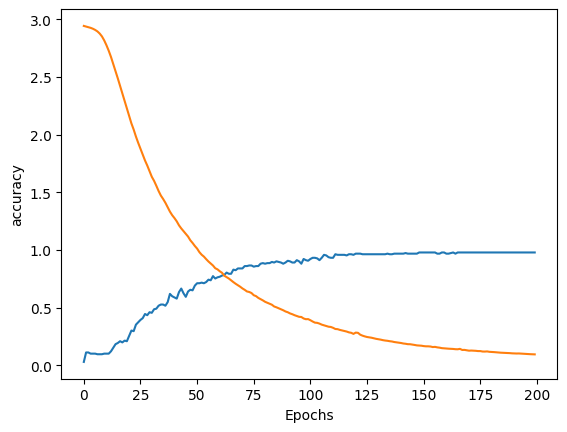

In [ ]:
#Model Analyse
plt.plot(train.history['accuracy'],label='training set accuracy')
plt.plot(train.history['loss'],label='training set loss')
plt.xlabel('Epochs')
plt.ylabel('accuracy')

In [ ]:
#testing
import random
import numpy as np
while True:
  texts_p = []
  prediction_input = input("You: ")

  #removing punctuation and converting to lowercase
  prediction_input = [letters.lower() for letters in prediction_input if letters not in string.punctuation] 
  prediction_input=''.join(prediction_input)
  texts_p.append(prediction_input)

  #tokenizing and padding
  prediction_input = tokenizer.texts_to_sequences (texts_p)
  prediction_input = np.array(prediction_input).reshape(-1)
  prediction_input = pad_sequences ([prediction_input], input_shape)

  #getting output from model
  output= model.predict(prediction_input)
  output = output.argmax()

  #finding the right tag and predicting

  response_tag= le.inverse_transform([output])[0]
  print("Bot: ", random.choice(responses [response_tag]))
  if response_tag=="goodbye":
    break


You: hi
1/1 [==============================] - 0s 419ms/step
Bot:  Greetings! How can I assist you today?
You: bye
1/1 [==============================] - 0s 22ms/step
Bot:  Thank you for visiting us. Have a great day!
